In [63]:
# Tokenization-> Word-Context Pairs-> Word Representation-> Input layer(vectors for the context words) ->multiplied by embedding matrix(continuous word vectors)-> averaged(context vectors)-> passed through fully connected layers-> model trained to minimize error using techniques like back propagation and gradient descent


import pandas as pd
import numpy as np
import collections
import re

In [64]:
f=open("text.txt")
doc1=f.read()
f.close()

In [26]:
doc1

'"It was the best of times,\nit was the worst of times,\nit was the age of wisdom,\nit was the age of foolishness"'

In [27]:
l_doc1 = re.sub(r"[^a-zA-Z0-9]", " ", doc1.lower()).split()

In [28]:
l_doc1

['it',
 'was',
 'the',
 'best',
 'of',
 'times',
 'it',
 'was',
 'the',
 'worst',
 'of',
 'times',
 'it',
 'was',
 'the',
 'age',
 'of',
 'wisdom',
 'it',
 'was',
 'the',
 'age',
 'of',
 'foolishness']

In [29]:
l=l_doc1

In [30]:
l

['it',
 'was',
 'the',
 'best',
 'of',
 'times',
 'it',
 'was',
 'the',
 'worst',
 'of',
 'times',
 'it',
 'was',
 'the',
 'age',
 'of',
 'wisdom',
 'it',
 'was',
 'the',
 'age',
 'of',
 'foolishness']

In [31]:
wordset=set(l)

In [32]:
wordset

{'age',
 'best',
 'foolishness',
 'it',
 'of',
 'the',
 'times',
 'was',
 'wisdom',
 'worst'}

In [33]:
def calculateBOW(wordset,l_doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in l_doc:
      tf_diz[word]=l_doc.count(word)
  return tf_diz

In [34]:
bow1 = calculateBOW(wordset,l_doc1)
df_bow = pd.DataFrame([bow1])
df_bow.head()

,it,wisdom,best,of,the,age,foolishness,times,worst,was
0,4,1,1,4,4,2,1,2,1,4


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [36]:
X = vectorizer.fit_transform([doc1])
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow_sklearn.head()

,age,best,foolishness,it,of,the,times,was,wisdom,worst
0,2,1,1,4,4,4,2,4,1,1


In [37]:
print(vectorizer.get_feature_names_out())

['age' 'best' 'foolishness' 'it' 'of' 'the' 'times' 'was' 'wisdom' 'worst']


In [38]:
import nltk
nltk.download('punkt')
import re
import numpy as np

f= open("text.txt")
text=f.read()
f.close()

dataset = nltk.sent_tokenize(text)

for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Praj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
print(dataset)

[' it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness ']


In [40]:
word2count = {}

for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [41]:
word2count

{'it': 4,
 'was': 4,
 'the': 4,
 'best': 1,
 'of': 4,
 'times': 2,
 'worst': 1,
 'age': 2,
 'wisdom': 1,
 'foolishness': 1}

In [42]:
words

['it',
 'was',
 'the',
 'best',
 'of',
 'times',
 'it',
 'was',
 'the',
 'worst',
 'of',
 'times',
 'it',
 'was',
 'the',
 'age',
 'of',
 'wisdom',
 'it',
 'was',
 'the',
 'age',
 'of',
 'foolishness']

In [43]:
len(words)

24

In [44]:
vocab_size = len(wordset)
embed_dim = 10
context_size = 4

In [45]:
word_to_ix = {word: i for i, word in enumerate(wordset)}
ix_to_word = {i: word for i, word in enumerate(wordset)}

In [46]:
word_to_ix

{'it': 0,
 'wisdom': 1,
 'best': 2,
 'of': 3,
 'the': 4,
 'age': 5,
 'foolishness': 6,
 'times': 7,
 'worst': 8,
 'was': 9}

In [47]:
ix_to_word

{0: 'it',
 1: 'wisdom',
 2: 'best',
 3: 'of',
 4: 'the',
 5: 'age',
 6: 'foolishness',
 7: 'times',
 8: 'worst',
 9: 'was'}

In [48]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['it', 'was', 'best', 'of'], 'the'), (['was', 'the', 'of', 'times'], 'best'), (['the', 'best', 'times', 'it'], 'of'), (['best', 'of', 'it', 'was'], 'times'), (['of', 'times', 'was', 'the'], 'it')]


In [49]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [50]:
embeddings

array([[0.2075171 , 0.10366687, 0.79591071, 0.0051792 , 0.40815658,
        0.47517551, 0.34869087, 0.15703127, 0.34588855, 0.55612519],
       [0.83717337, 0.21051477, 0.55606242, 0.63627581, 0.60359195,
        0.99153086, 0.3673765 , 0.3255215 , 0.30922498, 0.34768989],
       [0.53836713, 0.00970722, 0.75272418, 0.96967382, 0.0478695 ,
        0.88185818, 0.63291943, 0.53073761, 0.34480939, 0.33786061],
       [0.13739006, 0.27312587, 0.70309682, 0.82540224, 0.94210051,
        0.53428355, 0.95200918, 0.00922689, 0.40702071, 0.19463029],
       [0.86115603, 0.72891828, 0.74214631, 0.39177195, 0.11961529,
        0.9087298 , 0.30148349, 0.7769125 , 0.7330837 , 0.83493337],
       [0.00163271, 0.77261648, 0.96144157, 0.19092669, 0.5778523 ,
        0.01388653, 0.62078997, 0.27033164, 0.45100729, 0.18373206],
       [0.16077246, 0.43296251, 0.79185479, 0.08443399, 0.14499494,
        0.99029348, 0.54697859, 0.4369296 , 0.32327618, 0.80626695],
       [0.47267454, 0.54854787, 0.3214819

In [51]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [52]:
# result is a vector of log probabilities
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

# calculate the negative log-likelihood loss, commonly known as cross-entropy loss
# result is the average negative log-likelihood loss over a batch of data
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [53]:
import tensorflow as tf
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

In [54]:
# compute the average loss over the entire batch.

def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- out + softmax) / logits.shape[0]

In [55]:
# responsible for making forward passes through the model

# context_idxs: A list or array of indices representing the context words (usually integers) for a specific target word.
# theta: Model parameters or weights that are used to transform the context words into an embedding or prediction.

# reshape: convert the context word embeddings into a format that can be fed into subsequent operations.
    
# m= matrix containing word embeddings for all words in the vocabulary

# n= apply a linear transformation to the context word embeddings m

# o= converts the raw scores into probabilities over possible target words.

# The function returns three values:
# m: The context word embeddings.
# n: The output of the linear transformation.
# o: The log softmax probabilities over the vocabulary of target words.

def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)

    return m, n, o

In [56]:
# calculates the gradient of a loss with respect to the model parameters

# log_softmax_crossentropy_with_logits function is used to calculate the derivative of the loss with respect to the linear 
# output n. This derivative is often referred to as the gradient of the loss with respect to the model's raw scores.

# dw = m.T.dot(dlog): This operation calculates how a small change in the model's parameters theta would affect the loss.

# dw represents the gradient of the loss with respect to the model parameters. This gradient can be used to update the model 
# parameters during training via gradient descent or a similar optimization algorithm.

def backward(preds, theta, target_idxs):
    m, n, o = preds

    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)

    return dw

In [57]:
# returns the updated parameter vector theta.

def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [58]:
theta = np.random.uniform(-1, 1, ( context_size * embed_dim, vocab_size))

In [59]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)

        epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

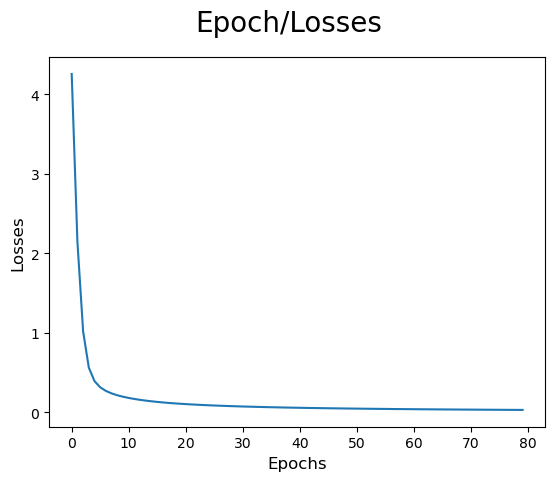

In [60]:
import matplotlib.pyplot as plt
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [61]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]

    return word
predict(['it', 'was', 'best', 'of'])

'the'

In [62]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1

    return (1 - (wrong / len(data)))
accuracy()

0.95